In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [135]:
df = pd.read_csv("processed/zheng_career_matches.csv")
df = df.drop(['BPSaved', 'Time'], axis=1).dropna()
df['Date'] = df['Date'].str.replace('\u2011', '-')
df['dateObj'] = pd.to_datetime(df['Date'], format='%d-%b-%Y') 
df = df[df['dateObj'].dt.year >= 2022]
# remove RET
df = df[~df['Score'].str.contains('RET')]

## convert to float
cols_to_convert = ['A%', 'DF%', '1stIn', '1st%', '2nd%']

for col in cols_to_convert:
    df[col] = df[col].str.rstrip('%').astype('float') / 100.0

## add more attributes
df['serveNetGain'] = df['A%'] - df['DF%']
df['win'] = df['Unnamed: 6'].str.split('d.').str[0].str.contains('Zheng')


In [136]:
# add more attributes
top15df = df[df['vRk']<=15]
top50df = df[(df['vRk']<=50) & (df['vRk']>15)]
othersDf = df[df['vRk']>50]
df['serveNetGain'] = df['A%'] - df['DF%']
df['win'] = df['Unnamed: 6'].str.split('d.').str[0].str.contains('Zheng')
print(f"vs. top 15: {len(top15df)}")
print(f"vs. top 50: {len(top50df)}")
print(f"vs. others: {len(othersDf)}")
df


vs. top 15: 12
vs. top 50: 18
vs. others: 39


,Date,Tournament,Surface,Rd,Rk,vRk,Unnamed: 6,Score,DR,A%,DF%,1stIn,1st%,2nd%,dateObj,serveNetGain,win
2,8-May-2023,Rome,Clay,QF,21.0,12.0,(11)Veronika Kudermetova [RUS] d. (22)Zheng,3-6 6-3 6-4,0.89,0.067,0.056,0.511,0.717,0.409,2023-05-08,0.011,False
3,8-May-2023,Rome,Clay,R16,21.0,75.0,(22)Zheng d. Xiyu Wang [CHN],6-4 3-6 6-1,1.19,0.041,0.082,0.592,0.759,0.425,2023-05-08,-0.041,True
4,8-May-2023,Rome,Clay,R32,21.0,93.0,(22)Zheng d. (Q)Anna Bondar [HUN],7-6(2) 6-4,1.20,0.051,0.051,0.628,0.633,0.483,2023-05-08,0.000,True
5,8-May-2023,Rome,Clay,R64,21.0,64.0,(22)Zheng d. Alize Cornet [FRA],6-3 7-6(2),1.41,0.070,0.042,0.606,0.744,0.536,2023-05-08,0.028,True
6,24-Apr-2023,Madrid,Clay,R32,24.0,17.0,(16)Ekaterina Alexandrova [RUS] d. (22)Zheng,5-7 6-4 6-2,0.88,0.105,0.074,0.442,0.714,0.472,2023-04-24,0.031,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,17-Jan-2022,Australian Open,Hard,Q1,108.0,161.0,(13)Zheng d. Coco Vandeweghe [USA],1-6 7-6(5) 6-1,1.00,0.046,0.092,0.517,0.778,0.429,2022-01-17,-0.046,True
82,3-Jan-2022,Melbourne 1,Hard,R16,126.0,81.0,(Q)Zheng d. Vera Zvonareva [RUS],5-7 6-3 6-4,1.09,0.117,0.081,0.495,0.800,0.411,2022-01-03,0.036,True
83,3-Jan-2022,Melbourne 1,Hard,R32,126.0,150.0,(Q)Zheng d. (LL)Mai Hontama [JPN],4-6 6-2 6-3,1.14,0.068,0.091,0.534,0.638,0.463,2022-01-03,-0.023,True
84,3-Jan-2022,Melbourne 1,Hard,Q2,126.0,93.0,(11)Zheng d. (3)Bernarda Pera [USA],6-3 1-6 7-5,0.97,0.079,0.053,0.434,0.758,0.442,2022-01-03,0.026,True


In [157]:
monthObj = 'monthObj'
key = 'dateObj'
freq = 'M'
grouped15 = top15df.groupby(pd.Grouper(key=key, freq=freq)).mean().dropna()
# Assuming your index is MultiIndex with levels [0] and [1] being Year and Month respectively
grouped15[monthObj] = pd.to_datetime(grouped15.index.get_level_values(0).astype(str), format='%Y-%m')
grouped15['Sample_Size'] = top15df.groupby(pd.Grouper(key=key, freq=freq)).size()

grouped50 = top50df.groupby(pd.Grouper(key=key, freq=freq)).mean().dropna()
# Assuming your index is MultiIndex with levels [0] and [1] being Year and Month respectively
grouped50[monthObj] = pd.to_datetime(grouped50.index.get_level_values(0).astype(str), format='%Y-%m')
grouped50['Sample_Size'] = top50df.groupby(pd.Grouper(key=key, freq=freq)).size()

groupedOthers = othersDf.groupby(pd.Grouper(key=key, freq=freq)).mean().dropna()
# Assuming your index is MultiIndex with levels [0] and [1] being Year and Month respectively
groupedOthers[monthObj] = pd.to_datetime(groupedOthers.index.get_level_values(0).astype(str), format='%Y-%m')
groupedOthers['Sample_Size'] = othersDf.groupby(pd.Grouper(key=key, freq=freq)).size()
groupedOthers
print(list(groupedOthers))
print(list(top15df))
print(df['A%'].dtype)
print(df['serveNetGain'].dtype)  # check data type
print(df['serveNetGain'].isnull().sum())  # check for NaN values


['Rk', 'vRk', 'DR', 'A%', 'DF%', '1stIn', '1st%', '2nd%', 'serveNetGain', 'win', 'monthObj', 'Sample_Size']
['Date', 'Tournament', 'Surface', 'Rd', 'Rk', 'vRk', 'Unnamed: 6', 'Score', 'DR', 'A%', 'DF%', '1stIn', '1st%', '2nd%', 'dateObj', 'serveNetGain', 'win']
float64
float64
0


In [158]:
grouped15

,Rk,vRk,DR,A%,DF%,1stIn,1st%,2nd%,serveNetGain,win,monthObj,Sample_Size
dateObj,,,,,,,,,,,,
2022-01-31,108.000000,8.0,0.670,0.111000,0.028,0.611000,0.614000,0.250000,0.083000,0.000000,2022-01-31,1
2022-05-31,74.000000,1.0,0.730,0.043000,0.054,0.533000,0.612000,0.302000,-0.011000,0.000000,2022-05-31,1
2022-08-31,51.000000,14.0,1.020,0.063000,0.084,0.505000,0.667000,0.511000,-0.021000,0.000000,2022-08-31,1
2022-09-30,36.000000,8.5,1.165,0.100000,0.059,0.589500,0.797000,0.440500,0.041000,1.000000,2022-09-30,2
2022-10-31,28.000000,1.0,0.720,0.094000,0.083,0.552000,0.717000,0.419000,0.011000,0.000000,2022-10-31,1
2023-02-28,27.333333,9.0,1.220,0.094333,0.032,0.554333,0.716667,0.509667,0.062333,0.666667,2023-02-28,3
2023-03-31,23.000000,15.0,1.160,0.176000,0.059,0.608000,0.774000,0.450000,0.117000,1.000000,2023-03-31,1
2023-04-30,25.000000,1.0,0.620,0.038000,0.058,0.462000,0.583000,0.429000,-0.020000,0.000000,2023-04-30,1
2023-05-31,21.000000,12.0,0.890,0.067000,0.056,0.511000,0.717000,0.409000,0.011000,0.000000,2023-05-31,1


<Figure size 1000x500 with 0 Axes>

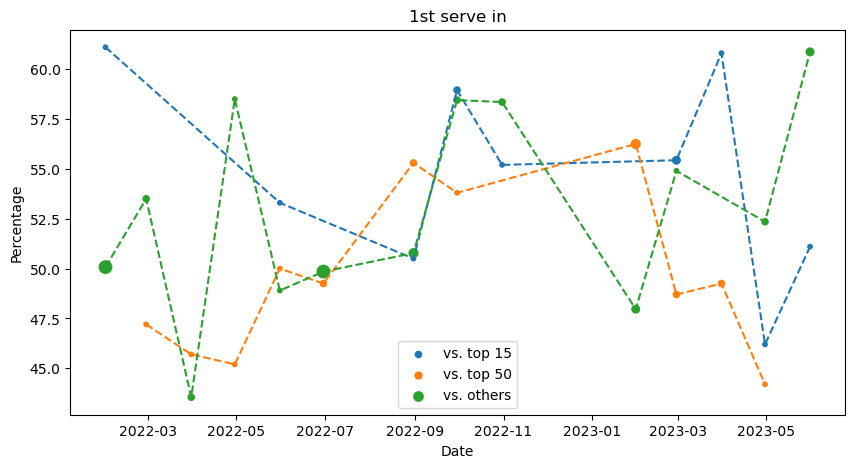

In [164]:
attribute = '1stIn'
sampleSize = 'Sample_Size'
scale = 10
plt.figure(figsize=(10, 5))  # Optional: Set the figure size
PERC = 100
fig, ax = plt.subplots(figsize=(10, 5))  # Optional: Set the figure size

# Create the scatter plots for 'columnA' and 'columnB'

ax.scatter(grouped15[monthObj], grouped15[attribute] * PERC, label='vs. top 15', s=scale * grouped15[sampleSize])
ax.plot(grouped15[monthObj],  grouped15[attribute] * PERC, '--') 
ax.scatter(grouped50[monthObj], grouped50[attribute] * PERC, label='vs. top 50', s=scale * grouped50[sampleSize])
ax.plot(grouped50[monthObj],  grouped50[attribute] * PERC, '--') 
ax.scatter(groupedOthers[monthObj], groupedOthers[attribute] * PERC, label='vs. others', s=scale * groupedOthers[sampleSize])
ax.plot(groupedOthers[monthObj],  groupedOthers[attribute] * PERC, '--') 

# Customize y-tick intervals
#ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10))  # Change base to your desired y-tick interval

ax.set_xlabel('Date')  # Label for x-axis
ax.set_ylabel('Percentage')  # Label for y-axis
ax.set_title('1st serve in')  # Title of the plot

ax.legend()  # Show the legend

plt.show()  # Display the plot

<Figure size 1000x500 with 0 Axes>

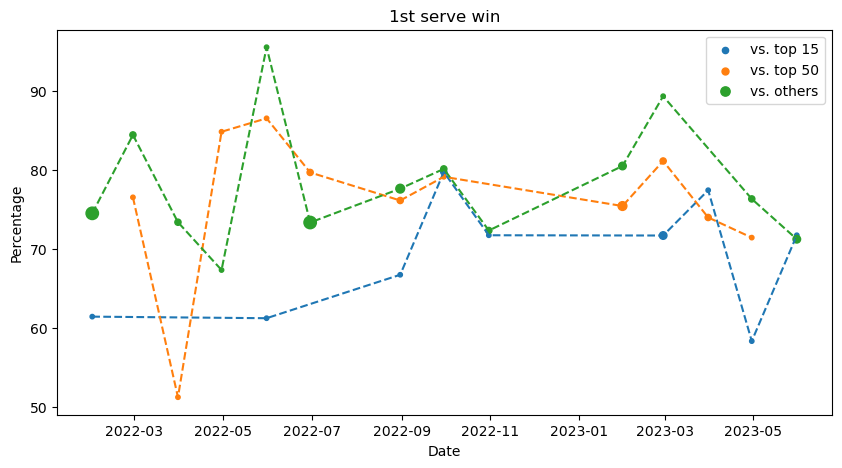

In [166]:
attribute = '1st%'
plt.figure(figsize=(10, 5))  # Optional: Set the figure size

fig, ax = plt.subplots(figsize=(10, 5))  # Optional: Set the figure size

# Create the scatter plots for 'columnA' and 'columnB'

ax.scatter(grouped15[monthObj], grouped15[attribute] * PERC, label='vs. top 15', s=scale * grouped15[sampleSize])
ax.plot(grouped15[monthObj],  grouped15[attribute] * PERC, '--') 
ax.scatter(grouped50[monthObj], grouped50[attribute] * PERC, label='vs. top 50', s=scale * grouped50[sampleSize])
ax.plot(grouped50[monthObj],  grouped50[attribute] * PERC, '--') 
ax.scatter(groupedOthers[monthObj], groupedOthers[attribute] * PERC, label='vs. others', s=scale * groupedOthers[sampleSize])
ax.plot(groupedOthers[monthObj],  groupedOthers[attribute] * PERC, '--') 
#ax.scatter(df['dateObj'], df['1st%'], label='1st serve win')

# Customize y-tick intervals
#ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10))  # Change base to your desired y-tick interval

ax.set_xlabel('Date')  # Label for x-axis
ax.set_ylabel('Percentage')  # Label for y-axis
ax.set_title('1st serve win')  # Title of the plot

ax.legend()  # Show the legend

plt.show()  # Display the plot

<Figure size 1000x500 with 0 Axes>

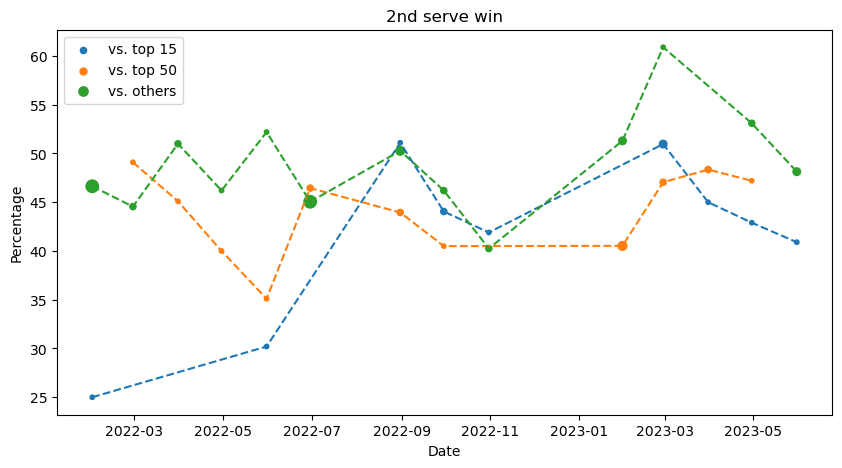

In [167]:
attribute = '2nd%'
plt.figure(figsize=(10, 5))  # Optional: Set the figure size

fig, ax = plt.subplots(figsize=(10, 5))  # Optional: Set the figure size

# Create the scatter plots for 'columnA' and 'columnB'
ax.scatter(grouped15[monthObj], grouped15[attribute] * PERC, label='vs. top 15', s=scale * grouped15[sampleSize])
ax.plot(grouped15[monthObj],  grouped15[attribute] * PERC, '--') 
ax.scatter(grouped50[monthObj], grouped50[attribute] * PERC, label='vs. top 50', s=scale * grouped50[sampleSize])
ax.plot(grouped50[monthObj],  grouped50[attribute] * PERC, '--') 
ax.scatter(groupedOthers[monthObj], groupedOthers[attribute] * PERC, label='vs. others', s=scale * groupedOthers[sampleSize])
ax.plot(groupedOthers[monthObj],  groupedOthers[attribute] * PERC, '--') 

#ax.scatter(df['dateObj'], df['1st%'], label='1st serve win')

# Customize y-tick intervals
#ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10))  # Change base to your desired y-tick interval

ax.set_xlabel('Date')  # Label for x-axis
ax.set_ylabel('Percentage')  # Label for y-axis
ax.set_title('2nd serve win')  # Title of the plot

ax.legend()  # Show the legend

plt.show()  # Display the plot

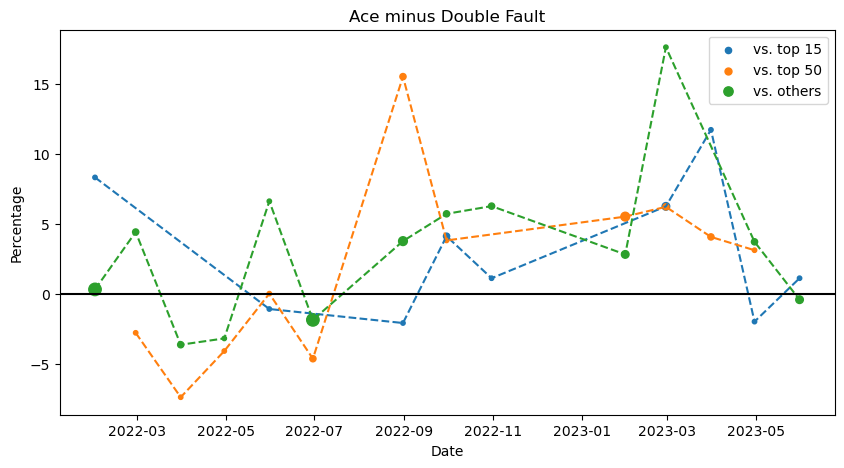

Ace minus DF > 0: 39 / 69
vs. top 15 players: 9 / 12
vs. top 50 players: 9 / 18
vs. other players: 21 / 39


In [171]:
attribute = 'serveNetGain'

fig, ax = plt.subplots(figsize=(10, 5))  # Optional: Set the figure size

# Create the scatter plots for 'columnA' and 'columnB'
ax.scatter(grouped15[monthObj], grouped15[attribute] * PERC, label='vs. top 15', s=scale * grouped15[sampleSize])
ax.plot(grouped15[monthObj],  grouped15[attribute] * PERC, '--') 
ax.scatter(grouped50[monthObj], grouped50[attribute] * PERC, label='vs. top 50', s=scale * grouped50[sampleSize])
ax.plot(grouped50[monthObj],  grouped50[attribute] * PERC, '--') 
ax.scatter(groupedOthers[monthObj], groupedOthers[attribute] * PERC, label='vs. others', s=scale * groupedOthers[sampleSize])
ax.plot(groupedOthers[monthObj],  groupedOthers[attribute] * PERC, '--') 

# Customize y-tick intervals
#ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10))  # Change base to your desired y-tick interval

ax.set_xlabel('Date')  # Label for x-axis
ax.set_ylabel('Percentage')  # Label for y-axis
ax.set_title('Ace minus Double Fault')  # Title of the plot
ax.axhline(0, color='black')  # Change color as needed
ax.legend()  # Show the legend

plt.show()  # Display the plot

print(f"Ace minus DF > 0: {len(df[df[attributes] > 0])} / {len(df)}")
print(f'vs. top 15 players: {len(top15df[top15df[attributes]>0])} / {len(top15df[attributes])}')
print(f'vs. top 50 players: {len(top50df[top50df[attributes]>0])} / {len(top50df[attributes])}')
print(f'vs. other players: {len(othersDf[othersDf[attributes]>0])} / {len(othersDf[attributes])}')